# Programming for Data Analytics: Project 2

# The Wisconsin Breast Cancer (Original) Dataset

## Table of Contents

* [1. Overview](#sec1)
* [2. Background](#sec2)
* [3. Classifiers Applied to Dataset](#sec3)
* [4. Comparing Performance of Classifiers](#sec4)
* [5. Statistical Analysis of Dataset](#sec5)
* [6. Machine Learning Algorithms for Analysis](#sec6)
* [7. Train a Set of Classifiers on Dataset](#sec7)
* [8. References](#sec8)

***

## 1. Overview <a class="anchor" id="sec1"></a>

The Wisconsin Breast Cancer (Original) Dataset (WBCD) consists of biopsic test result data taken from patients' breasts. The data was collected by Dr. William H. Wolberg, a surgeon at the University of Wisonsin Hospital in Madison, Wisconsin, USA. The dataset was made available publicly online in 1992. 

The dataset contains records collected from 699 patients. 65.5% (458) of these patients had a benign breast cancer tumour, while 34.5% (241) had a malignant breast cancer tumour.

The WBCD is used by researchers focused on breast cancer prediction using machine learning, with the end goal of earlier diagnoses breast cancer. The goal of the dataset is to practice classification analysis, to be able to predict which of sub-populations a new observations belongs to , on the basis of chosen metrics. Machine-learning algorithms have been applied to this dataset in order to improve the speed and accuracy of these diagnoses with a benign or malignant classification being assigned according to the attribute readings.

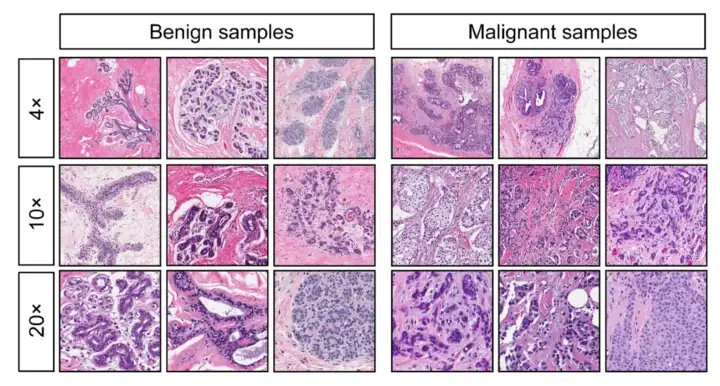

## 2. Background <a class="anchor" id="sec2"></a>

To compile this dataset, fluid samples were taken via biopsy from patients with solid breast masses. Xcyt, a graphical computer program, was used to analyse the cytological features based on a digital scan of the solid breast masses. Via a curve-fitting algorithm, this program computed various features from a digitized image of a fine needle aspirate of the breast masses. It evaluated ten features from each one of the cells in the sample. It then calculated the mean value, extreme value, and standard error of each feature for the image. Putting this data to use, the program then returned a 30 real-valuated vector. 

Data on ten attributes of the tumours were collected. These are as follows:

1. Clump Thickness
2. Uniformity of cell size
3. Uniformity of cell shape
4. Marginal adhesion
5. Single epithelial cell size
6. Bare nuclei
7. Bland chromatin
8. Normal nucleoli
9. Mitoses
10. Class 

11. Sample code number id

Attributes are graded on a scale of 1-10 (as an indication of the degree of abnormality). Each attribute has been used to represent instances. An instance is assigned a class of either benign (class designation "2") or malignant (class designation "4").  

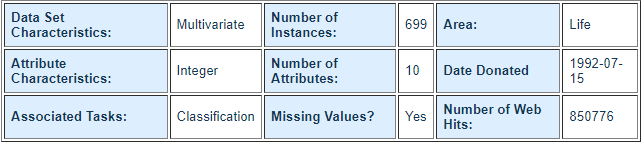

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import time
import sklearn

from IPython.display import display
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline 

# This is what the dataset currently looks like:
dframe = pd.read_csv("breast_cancer_bd.csv")
dframe.head(10)

A classification method called Muti-Surface Method-Tree, which uses linear programming to construct a decision tree was originally used to select relevant features. 

## 3. Classifiers Applied to Dataset <a class="anchor" id="sec3"></a>

There are ten numerical variables in this dataset. All of the variables are of discrete type. The first nine variables are feature variables. The tenth variable, Class, is the target variable.

In [ ]:
# Attributes and their datatypes:
dframe.dtypes

In [ ]:
# Broad overview of attribute statistics:
dframe.describe()

### First Look at Each Attribute

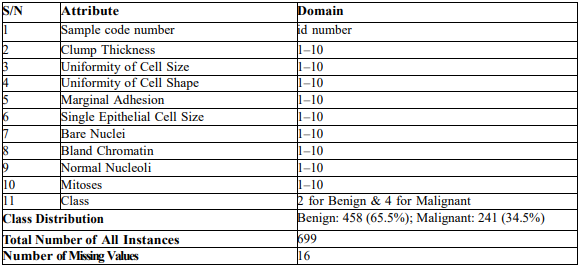

In [ ]:
# 1. Clump thickness:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Clump Thickness', hue = 'Class', data = dframe, palette = 'bright');

In [ ]:
# 2. Uniformity of cell size:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Size', hue = 'Class', data = dframe, palette = 'bright');

In [ ]:
# 3. Uniformity of cell shape:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Shape', hue = 'Class', data = dframe, palette = 'bright');

In [ ]:
# 4. Marginal Adhesion:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Marginal Adhesion', hue = 'Class', data = dframe, palette = 'bright');

In [ ]:
# 5. Single epithelial cell size:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Single Epithelial Cell Size', hue = 'Class', data = dframe, palette = 'bright');

In [ ]:
# 6. Bare nuclei:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bare Nuclei', hue = 'Class', data = dframe, palette = 'bright');

In [ ]:
# 7. Bland chromatin:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bland Chromatin', hue = 'Class', data = dframe, palette = 'bright');

In [ ]:
# 8. Normal nucleoli:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Normal Nucleoli', hue = 'Class', data = dframe, palette = 'bright');

In [ ]:
# 9. Mitoses:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Mitoses', hue = 'Class', data = dframe, palette = 'bright');

### Overview of Attributes

In [ ]:
# Overview of all attributes, renaming:
sns.set()
columns = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']
sns.pairplot(dframe[columns], height=2.5)
plt.show();

### Brief Look at Removing Outliers

In [ ]:
# Removing outliers:
def remove_outlier(df_in, columns_name):
    q1 = df_in[columns_name].quantile(0.25)
    q3 = df_in[columns_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[columns_name] > fence_low) & (df_in[columns_name] < fence_high)]
    return df_out

In [ ]:
# Confirm that clump thickness outliers have been removed:
remove_outlier(dframe, "Clump Thickness")

In [ ]:
# Confirm normal nucleoli outliers removed:
remove_outlier(dframe, "Normal Nucleoli")

In [ ]:
# Summary of dataset:
dframe.info()

In [ ]:
# Frequency distribution of target variable Class:
dframe['Class'].value_counts()

In [ ]:
# Percentage of frequency distribution of target variable Class:
dframe['Class'].value_counts()/np.float(len(dframe))

We see from the code above that the Class variable containe two class labels, 2 indicating benign tumours and 4 indicating malignant tumours.

In [ ]:
# Summary statistics:
print(round(dframe.describe(),2))

### Classifiers

As previously stated, each instance will be assigned a classification of benign or malignant based on the dimensionality of the nine attributes listed above. dat can be divided into three parts: means (3-13) standard error (13-23) and Worst(23-32) each contain 10 parameter radius, texture, area, perimeter, smoothness, compactness, concavity, concave points, symmetry and fractal dimension. The malignant class are considered outliers, and the benign class are considered inliers. This can be seen in the overview graph of all nine attributes above.

When considering which algorithm to apply to a dataset like the WBCD, researchers will use the tool that offers the best classification results. With this in mind, outliers and irregular instances are generally filtered out of the dataset. 

In the next section I will discuss three different algorithms that researchers have used on the WBCD in the search for the most precise and accurate classification identification.

## 4. Comparing Performance of Classifiers <a class="anchor" id="sec4"></a>

### Naive Bayes

This classifier assumes independence between variables. It makes a prediction based on the probability of an object. It is particularly useful for working wth datasets with high dimensions.

When it comes to predicting a class within a dataset, this classifier is efficient and accurate. It can be applied to binary and multi-class classifications. However it cannot interpret a relationship between features, and so is of limited use when working with related features.

Application of this classifier can take one of three directions: Gaussian, Multinomial, or Bernoulli.

The Gaussian option assumes all features have a normal distribution.

The multinomial option us used when a dataset contains multinomial distribution. It is not of particular use for the WNCD.

The Bernoulli classifier is applied when prefictor variables are independent boolean variables. 

### Random Forest

The Random Forest classifier (RF), or Bagging classifier, is a supervised machine learning method that combines output of several decision trees (possible outcomes)to form an ensemble forest of trees. Decision trees may also be called classification trees. Possible outcomes are created before applying the classifier. 

It is a popular choice for the purposes of classification. Proponents of this approach argue that a single decision tree can either produce a certain or very simple model. As a result, the stability of the classification is increased in comparison to using a single decision tree classifier. 

The main advantage of RF is that its performance is not affected by outliers or irrelevant data with the dataset. The ability to handle data minorities is a significant advantage when it comes to cancer detection. However a significant disadvantage of this method is that coorrelation between two or more trees can increase the error rate. The error rate in this instance is calculated on the correlation of variables, and this is a point to be mindful of when applying this classifier.

This classifier is based on a recursive method, in which every iteration picks one random sample of a speicified size from the dataset with replacement, and another random sample from the predictors without replacement. The data is then partitioned. The data not chosen in the sampling process is dropped. This process repeats until the sampled data cannot be divided without affecting the the accuracy of the diagnoses or it reaches the desired accuracy level. After the necessary number of iterations, a count of trees is made and these cases are classified based on a majority vote over the decision trees.  

### K Nearest Neighbour

This supervised machine learning algorithm is one of the simplest machine learning algorithms, and is used to solve classification and regression problems. It assumes that similar objects existing in close proximity to each other. It does not require any underlying assumptions to be made. Nor does it require training data points for model generation. For this reason it is particularly useful when considering the relationships between variables or attributes. 

Also known as KNN, this classifier outperforms the RF classifier when working with minimal attributes. It is limited by how it cannot minimize noise within a model. For this reason it performs best when applied to a model with low dimensionality, otherwise its run-speed is affected.

This algorithm calculates the distance between a sample data point and all other training data points. It then selects the k nearest data points (where k is an integer) and assigns the sample data point to the class of which the majority of k data points belong. 

### Support Vector Machines

This algorithm finds the number of features within a specified space, and classifies these datapoints accordingly. It is a supervised learning algorith used for classification and regression problems.

Once applied to a dataset, it draws a boundary between datapoints based on which class it assigns to them. This process is called a hyperplane.

In practice, this classifier will use a linear approach for data that can be separated into two classes. In contrast, the non-linear approach will be applied to data that cannot be divided by a straight line. 

Researchers have found that the SVM, alongside Random Forest and Linear Discriminant Analysis, can reliably provide accuracy results of 96.4% and 95.6% respectively [4. Adebiyi MO, et al.].

## 5. Statistical Analysis of Dataset <a class="anchor" id="sec5"></a>

With a basic understanding of a dataset, plots and graphs can allow for a greater understanding of the significance of the data points.

### Preparing the Data

According the the documentation accompanying the dataset, there are sixteen missing attribute values that need to be addressed before continuing. 

As shown below, the distribution of values shows that the data tyoe bare_nuclei is of type integer, but a closer look at the dataframe presents it as type object. It must be converted from data type object to integer.

In [ ]:
# New dataframe:
cancer_df = pd.read_csv('breast_cancer_bd.csv')
cancer_df.head()

In [ ]:
cancer_header = [ \
                 'sample_code_number', \
                 'clump_thickness', \
                 'uniformity_cell_size', \
                 'uniformity_cell_shape', \
                 'marginal_adhesion', \
                 'single_epithelial_cell_size', \
                 'bare_nuclei', \
                 'bland_chromatin', \
                 'normal_nucleoli', \
                 'mitoses', \
                 'class']

In [ ]:
cancer_db = pd.read_csv('breast_cancer_bd.csv', header=None, names=cancer_header)
cancer_db.head()

In [ ]:
# Setting header row number:
cancer_db = pd.read_csv('breast_cancer_bd.csv', header=None, names=cancer_header)
cancer_db.head()

In [ ]:
# Look at clump thinckness statistics, verify output with documentation:
cancer_db["clump_thickness"].describe()

In [ ]:
# Look at bare nuclei statistics, verify output with documentation:
cancer_db["bare_nuclei"].describe()

In [ ]:
# previous output: datatype object, look closer
cancer_db["bare_nuclei"].unique()

In [ ]:
# Unavailable attributes to be converted to numerical:
#cancer_db["bare_nuclei"] = cancer_db["bare_nuclei"].convert_objects(convert_numeric=True)

In [ ]:
cancer_db["bare_nuclei"].unique()

In [ ]:
cancer_db.fillna(cancer_db.mean().round(), inplace=True)
cancer_db["bare_nuclei"].unique()

In [ ]:
cancer_db.mean().round()

In [ ]:
cancer_db = pd.read_csv('breast_cancer_bd.csv', header=None, names=cancer_header)
cancer_db = cancer_db.convert_objects(convert_numeric=True)
cancer_db.fillna(cancer_db.mean().round(), inplace=True)
cancer_db["bare_nuclei"].describe()

In [ ]:
cancer_db["bare_nuclei"].unique()

In [ ]:
cancer_db.describe()

In [ ]:
dframe["Clump Thickness"].count()

In [ ]:
# Correlation:
cor_matrix = dframe.corr().abs()
cor_matrix

In [ ]:
import numpy as np
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

In [ ]:
cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
cols

In [ ]:
dframe.columns

In [ ]:
dframe.drop('Uniformity of Cell Shape',inplace=True)

### Correlation Test

The Pearson Correlation coefficient can now be added using corrcoef(). This function will take in a matrix of a specified size where each column will represent the values of a random variable. Each row will represent a single sample of a number of random variables.

This allows to test the strength of a relationship between two variables. 

This function will allow for values between -1 and 1. If 0 is output, then there is no correlation. The output will so be interpreted as either negative or positive. Outliers can influence the outcome of this function. 

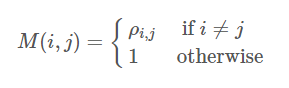

In [ ]:
import scipy.stats as ss
pearson_coef, p_value = ss.pearsonr(dframe['Clump Thickness'], dframe['Class'])
pearson_coef, p_value

# output inicates statistical significance of variables:
# note p-values less than 0.5

In [ ]:
pearson_coef, p_value = ss.pearsonr(dframe['Uniformity of Cell Size'], dframe['Class'])
pearson_coef, p_value

In [ ]:
pearson_coef, p_value = ss.pearsonr(dframe['Bare Nuclei'], dframe['Class'])
pearson_coef, p_value

In [ ]:
pearson_coef, p_value = ss.pearsonr(dframe['Mitoses'], dframe['Class'])
pearson_coef, p_value

# note output p-value less than 0.5:

In [ ]:
sns.regplot(x="Mitoses", y="Class", data=dframe);
sns.regplot(x="Clump Thickness", y="Class", data=dframe);
sns.regplot(x="Single Epithelial Cell Size", y="Class", data=dframe);
sns.regplot(x="Bland Chromatin", y="Class", data=dframe);
sns.regplot(x="Uniformity of Cell Size", y="Class", data=dframe);
sns.regplot(x="Mitoses", y="Class", data=dframe);

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
selection = dframe.columns[4:9]
#Correlation between sets of features
corr = dframe[selection].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 17}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels=selection, size = 15)
g.set_yticklabels(rotation=0, labels=selection, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (17,17)

### Visualization with ggplot

In [ ]:
# IPython for ggplot: 
%matplotlib inline 
from ggplot import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Plotting histogram clump thickness:
plt = ggplot(aes(x = 'clump_thickness'), data = cancer_db) + \
        geom_histogram(binwidth = 1, fill = 'blue')
print plt

In [ ]:
# Plotting clump thickness mean:
plt = ggplot(aes(x = 'clump_thickness'), data = cancer_db) + \
        geom_histogram(binwidth = 1, fill = 'blue') + \
        geom_vline(xintercept = [cancer_db['clump_thickness'].mean()], linetype='dashed')
print plt

In [ ]:
# Scatter plot:
plt = ggplot(aes(x = 'uniformity_cell_shape', y = 'bare_nuclei'), data = cancer_db) + \
        geom_point()
print plt

In [ ]:
# Improving display:
plt = ggplot(aes(x = 'uniformity_cell_shape', y = 'bare_nuclei', color = 'class'), data = cancer_db) + \
        geom_point(position = 'jitter')
print plt

In [ ]:
# Visualize patterns:
plt = ggplot(aes(x = 'uniformity_cell_shape', y = 'bare_nuclei', color = 'class'), data = cancer_db) + \
        geom_point(position = 'jitter') + \
        ggtitle("The Effect of the Bare Nuclei and Cell Shape Uniformity on Classification") + \
        ylab("Amount of Bare Nuclei") + \
        xlab("Uniformity in Cell shape")
print plt

### Distribution

In [ ]:
# Correcting bare_nuclei data type value:
for var in cancer_db.columns:
    print(dframe[var].value_counts)

In [ ]:
# Converting data type:
cancer_db['Bare_Nuclei']=pf.to_numeric(dframe['Bare_Nuclei'], errors='coerce')

In [ ]:
# Check correction:
cancer_db.types

### Univariate Plots

Histograms are useful when you wish to explore whether variable distributions are normal or skewed.

The code below shows that all the variables in this dataset are positively skewed.

In [ ]:
# Distribution of variables:

plt.rcParams['figure.figsize']=(30,25)

cancer_db.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()


### Multivariate Plots

With smaller datasets like WBCD, it is simple to compute the standard correlation coefficient between every pair of attributes. This can also be referred to as Pearson's r.

The code below explores how each attribute correlates with the target variable.

In [ ]:
correlation['Class'].sort_values(ascending=False)

The correlation coefficient ranges from -1 to +1. A result of +1 indicates a strong positive correlation, while -1 indicates a strong negative correlation. A result of 0 indicates zero correlation. 

The code above shows a strong positive correlation between Class and three other variables: Bare_Nuclei, Uniformity_Cell_Shape, and Uniformity_Cell_Size. 

All variables are positively correlated with the Class variable, however some variables are strongly positively correlated while others are negatively so. 

### Correlation Relationships: Class

In [ ]:
# Heat map showing correlation:

plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

The above code shows us that variables Uniformity_Cell_Size, Uniformity_Cell_Shape, and Bare_Nuclei each have a correlation coefficient of 0.82 with the target variable Class. This is a strongly positive correlation. 

Clump_Thickness has a correlation coefficient of 0.72 to Class, Marginal_Adhesion has a correlation coefficient of 0.79, Single_Epithelial_Cell_Size has a correlation coefficient of 0.68, and Normal_Nucleoli has a correlatation coefficient of 0.71. These figures indicate a positive correlation between these variables and the variable Class.

Notably the only variable with a correlation coefficient close to zero is Mitoses, with a figure of 0.42. However this is still a positive correlation. Mitoses has a similar positive correlation to all of the other variables, with a correlation coefficient of approx. 0.50.

## 6. Machine Learning Algorithms for Analysis <a class="anchor" id="sec6"></a>

Before applying a machine learning algorithm to the dataset, it is important to create a baseline classification model to measure the results against. This can be done by simply predicting the distribution of two attributes in advance. 

With supervised learning algorithms we will predict whether each tumour is benign or malignant by considering the features of the data given to the algorithm. With supervised learning the class labels are a known quantity.

Ideally, several different algorithms will be tested on the dataset and their performance will be measured and compared. If it performs well on a training dataset, then it can used to make predictions on new datasets.

### Preprocessing Dataset

In [ ]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

In [ ]:
# Missing values as '?': convert to NaNs, then count, then int
import numpy as np

data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

In [ ]:
# Note: only bare nuclei column missing values
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

In [ ]:
# Outliers:
data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

In [ ]:
# Standard values:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

In [ ]:
# Discarding columns with Z > 3 or Z <= -3
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

In [ ]:
# Duplicates:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

In [ ]:
# Sample:
sample = data.sample(n=3)
sample


In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

In [ ]:
# Values to categories:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

In [ ]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

In [ ]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

The code above assumes that the missing data points are random. The missing values can be addressed by either mean/median imputation, or by random sample imputation. However median imputation is the most apporpriate method to use when dealing with outliers. 

Imputation should be applied to the training set, and then passed on to the test set. This avoids overfitting.

In [ ]:
X_train.dtypes

In [ ]:
# Check missing values in numerical variables in X_train:

X_train.isnull().sum()

In [ ]:
# Check missing values in numerical variables in X_test:

X_test.isnull().sum()

In [ ]:
# Percentage of missing values in training set:

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [ ]:
# Apply median imputation to missing values:

for data in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        data[col].fillna(col_median, inplace=True)  

In [ ]:
# Verify above method has worked:

X_train.isnull().sum()
X_test.isnull().sum()

In [ ]:
# No missing values:

X_train.head()
X_test.head()

The training and testing datasets are now ready for model building, but first they need to have their feature variables mapped onto the same scale. This is called feature scaling. 

### Naive Bayes and Feature Scaling

In [ ]:
data = data2.drop("Class", axis=1)
y = data2["Class"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
# Same with uni cell shape:
data = data2.drop(['Uniformity of Cell Shape', 'Class'], axis=1)
y = data2['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
# Repeat with mitoses and bare nuc:
data = data2.drop(["Mitoses", "Bare Nuclei"], axis=1)
y = data2["Class"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

## 7. Train a Set of Classifiers on Dataset <a class="anchor" id="sec7"></a>

In [ ]:
# CleanData and Output as training and test:

CleanData = dframe
Output = CleanData['Class']

In [ ]:
features_list = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']

In [ ]:
features = CleanData[features_list]

In [ ]:
features.head()

In [ ]:
Output.head()

In [ ]:
from sklearn.model_selection import train_test_split

features_train, features_test, Output_train, Output_test = train_test_split(features, Output, test_size = 0.33, random_state = 324)

In [ ]:
print("Number instances in features_train dataset: ", features_train.shape)
print("Number instances in Output_train dataset: ", Output_train.shape)
print("Number instances in features_test dataset: ", features_test.shape)
print("Number instances in Output_test dataset: ", Output_test.shape)

In [ ]:
# Data Imbalance:
print("Before OverSampling, counts of Benign Class '2': {}".format(sum(Output_train==2)))
print("Before OverSampling, counts of Malignant Class '4': {} \n".format(sum(Output_train==4)))

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
features_train_res, Output_train_res = sm.fit_sample(features_train, Output_train)

In [ ]:
print('After OverSampling, the shape of features_X: {}'.format(features_train_res.shape))
print('After OverSampling, the shape of Output_y: {} \n'.format(Output_train_res.shape))

print("After OverSampling, counts of Benign Class '2': {}".format(sum(Output_train_res==2)))
print("After OverSampling, counts of Malignant Class '4': {}".format(sum(Output_train_res==4)))

In [ ]:
features_train.dtypes

In [ ]:
from sklearn.naive_bayes import GaussianNB
recurrence_classifier = GaussianNB()

# Fit to training dataset:
recurrence_classifier.fit(features_train_res, Output_train_res)

In [ ]:
type(recurrence_classifier)

In [ ]:
# Indicator test index 10:
Output_test.head(10)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()

In [ ]:
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()

In [ ]:
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

### K Nearest Neighbour

This model should be assigned a value of k that provides the highest accuracy. The accuracy of the resulting classification will be determined primarily by the k input. While a lower value of k will allow for a high probability of overfitting, a large value of k will computationally demanding. The higher k value will also have lower variance, but higher bias. 

With this dataset, there are an even number of classes and so k will be assigned an uneven integer. Ideally the model should be tested using the cross-validation technique, which allows for comparing different values of k.

In [ ]:
# for 22 neighbours in range:
for i in range(1, 22):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

In [ ]:
for i in range(1, 22):
    rf = RandomForestClassifier(n_estimators = i)
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=18)
rf = rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initiating the model:
nb = GaussianNB()

nb = nb.fit(X_train, y_train)

predicted = nb.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (acc_test))

### Predicitng Results for Testing Dataset

In [ ]:
y_pred = knn.predict(X_test)

y_pred

The predict_proba method gives the probabilities for each classification in array form. 

In [ ]:
# Probability of tumour being benign(2):

knn.predict_proba(X_test)[:,0]

In [ ]:
# Probability of tumour being malignant(4):

knn.predict_proba(X_test)[:,1]

### Checking Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

The code above shows that the y_test are the true class labels and y_pred are the predicted class labels in the test_set. The traiing and testing datasets accuracy can now be checked for underfitting and overfitting. 

In [ ]:
# Accuracy scores:

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

The training dataset accuracy score is 0.98 while the testing dataset accuracy sscore is 0.97. That both scores are so close indicates that there overfitting will not be a problem moving forward. 

We now compare the above model accuracy score with the accuracy that could be achieved by always predicting the most frequent class. This is known as null accuracy. 

We begin by checking the class distribution in the testing dataset. The most frequent class is 85. Null accuracy is calculated by dividing the most frequent class by the total number of occurances. 

With a model accuray score of 0.97 and a null accuracy score of 0.61, we can conclude that this model is reasonably accurate when predicting class labels. 

In [ ]:
y_test.value_counts()

In [ ]:
null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train,Y_train)

In [ ]:
# All benign?
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(Y_test,y_predict)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(Y_test,y_predict))

In [ ]:
min_train = X_train.min()
min_train

In [ ]:
range_train = (X_train-min_train).max()
range_train

In [ ]:
X_train_scaled = (X_train-min_train)/range_train
X_train_scaled

In [ ]:
min_test = X_test.min()
range_test = (X_test-min_test).max()
X_test_scaled = (X_test-min_test)/range_test

In [ ]:
svc_model = SVC()
svc_model.fit(X_train_scaled,Y_train)

In [ ]:
array = []

y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(Y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(Y_test,y_predict))

## 8. References <a class="anchor" id="sec8"></a>

1. https://www.kaggle.com/datasets/mariolisboa/breast-cancer-wisconsin-original-data-set

2. Asri, H.; Mousannif, H.; Al Moatassime, H.; Noel, T. Using Machine Learning Algorithms for Breast Cancer Risk Prediction and
Diagnosis. Procedia Comput. Sci. 2016, 83, 1064–1069.

3. Sonali Nandish Manoli, Padma S.K, 2017, Study and Analysis of Breast Cancer Data, INTERNATIONAL JOURNAL OF ENGINEERING RESEARCH & TECHNOLOGY (IJERT) NLPGPS – 2017 (Volume 5 – Issue 21).

4. Adebiyi, M.O. et al. (2022) “A linear discriminant analysis and classification model for breast cancer diagnosis,” Applied Sciences, 12(22), p. 11455. Available at: https://doi.org/10.3390/app122211455. 

5. Ahmed, M.T., Imtiaz, M.N. and Karmakar, A. (2020) “Analysis of Wisconsin Breast Cancer Original dataset using data mining and machine learning algorithms for breast cancer prediction,” Journal of Science Technology and Environment Informatics, 9(2), pp. 665–672. Available at: https://doi.org/10.18801/jstei.090220.67. 

### Code

http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html

https://github.com/NanditaA/ML-Supervised-Classification/blob/master/Breast%20Cancer%20Classification.ipynb

https://www.kaggle.com/code/pratikkgandhi/predicting-breast-cancer-with-random-forest-95/notebook

https://www.kaggle.com/code/thewiredbear/tutorial-svm-with-breast-cancer-dataset

https://www.kaggle.com/code/prashant111/knn-classifier-tutorial/notebook